In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from Wind.Results import DBResults
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff


# Fitting MLP s2s

## Fit1

In [10]:
query={'experiment':'mlps2sfit'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'full'], data=['lag'])

In [11]:
#results.exp_df 

In [12]:
a=results.exp_df.groupby(['site','drop','full','lag'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20103b9080>,
      dtype=object)

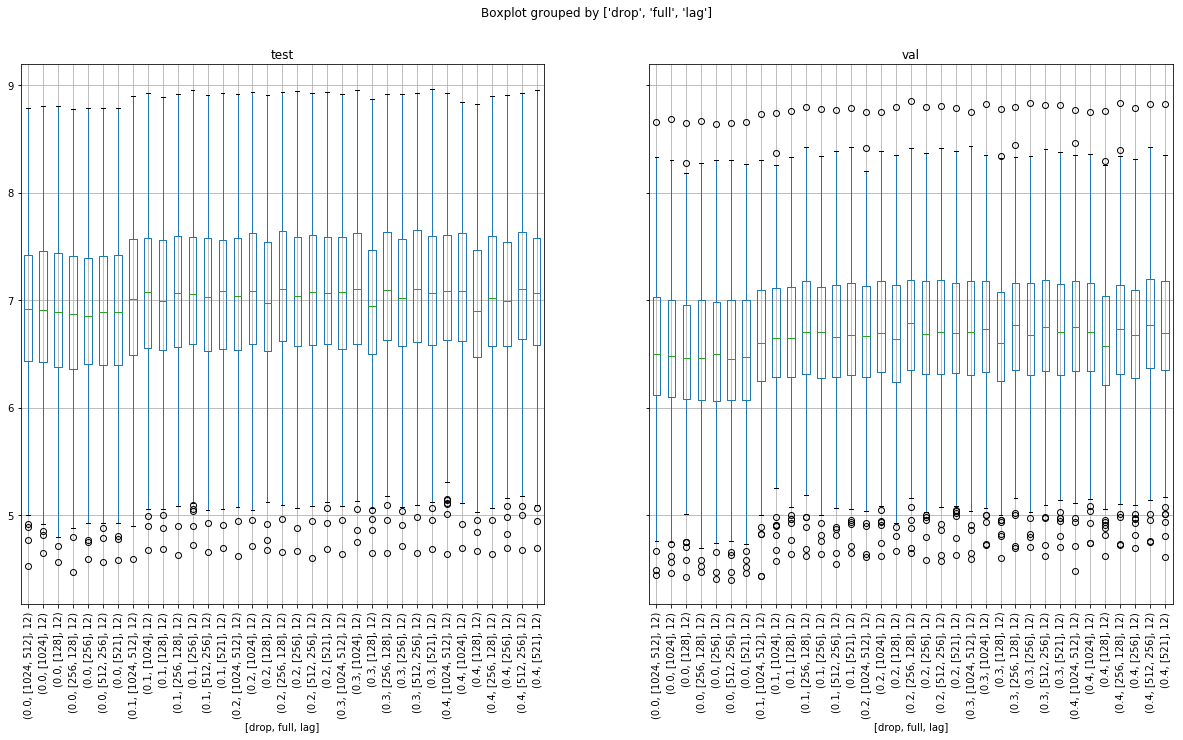

In [13]:
a[a['lag']=='12'].boxplot(by=['drop', 'full', 'lag'],figsize=(20,10), rot=90)

In [14]:
b =a.groupby(by=['full', 'drop','lag'],as_index=False).mean()
b.style.highlight_max()

,full,drop,lag,test,val
0,"[1024, 512]",0.0,12,6.85977,6.53124
1,"[1024, 512]",0.0,18,6.80429,6.47341
2,"[1024, 512]",0.1,12,6.94709,6.62673
3,"[1024, 512]",0.1,18,6.89015,6.56875
4,"[1024, 512]",0.2,12,6.98198,6.68287
5,"[1024, 512]",0.2,18,6.9258,6.6208
6,"[1024, 512]",0.3,12,7.00668,6.71684
7,"[1024, 512]",0.3,18,6.9493,6.6559
8,"[1024, 512]",0.4,12,7.01817,6.74003
9,"[1024, 512]",0.4,18,6.96396,6.68174


In [23]:
trace = go.Scatter(
    x = b['test'],
    y = b['val'],
    text='F-'+b['full'].astype(str) + 'D-' + b['drop'].astype(str) + '-L' + b['lag'].astype(str), 
    mode = 'markers'
)
py.iplot([trace], filename='basic-scatter')

Best models 12/512-256/(0.3,0.4)

## Fit 2

In [29]:
query={'experiment':'mlps2sfit2'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'full', 'activation'], data=['lag'])

In [30]:
a=results.exp_df.groupby(['site','activation','drop','full','lag'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f201c7c7cf8>,
      dtype=object)

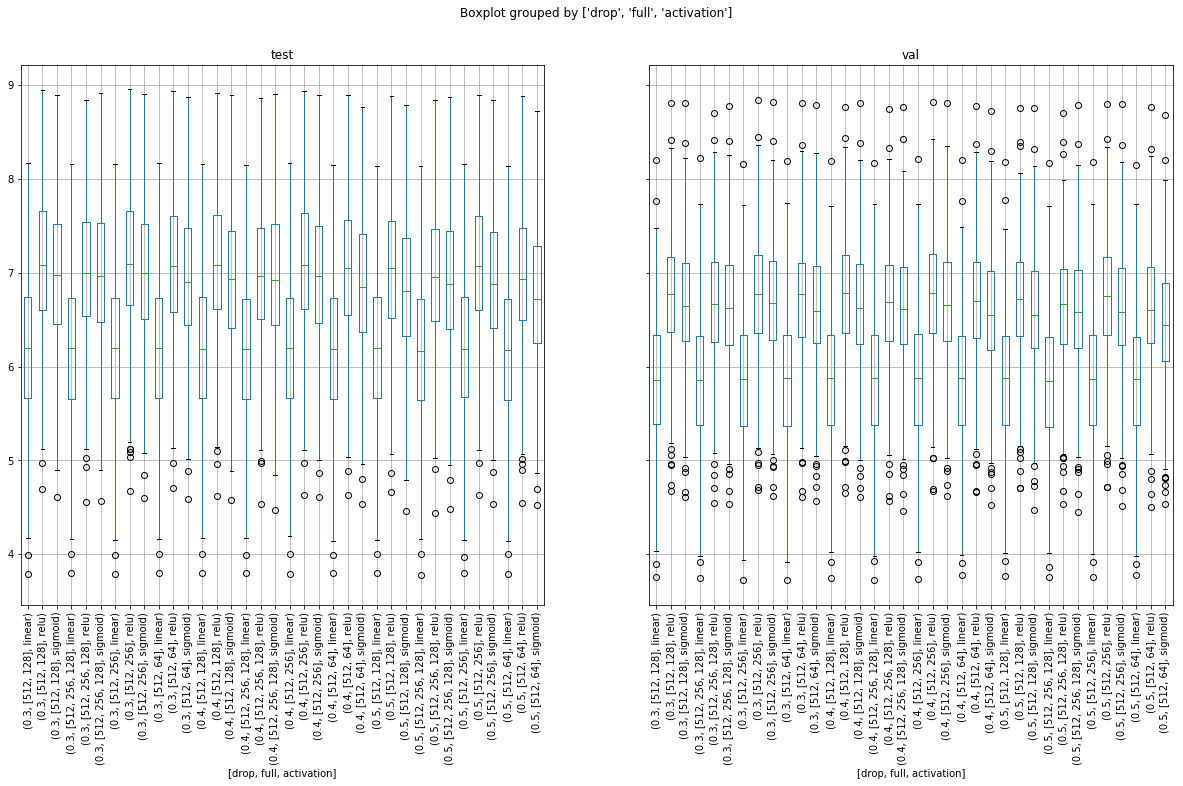

In [31]:
a.boxplot(by=['drop', 'full', 'activation'],figsize=(20,10), rot=90)

In [32]:
b =a.groupby(by=['activation','full', 'drop','lag'],as_index=False).mean()
b.style.highlight_max()

,activation,full,drop,lag,test,val
0,linear,"[512, 128]",0.3,12,6.15236,5.85215
1,linear,"[512, 128]",0.4,12,6.14948,5.85248
2,linear,"[512, 128]",0.5,12,6.14253,5.84969
3,linear,"[512, 256, 128]",0.3,12,6.14588,5.8468
4,linear,"[512, 256, 128]",0.4,12,6.139,5.84455
5,linear,"[512, 256, 128]",0.5,12,6.12334,5.83767
6,linear,"[512, 256]",0.3,12,6.15549,5.85282
7,linear,"[512, 256]",0.4,12,6.15232,5.85478
8,linear,"[512, 256]",0.5,12,6.14873,5.85163
9,linear,"[512, 64]",0.3,12,6.14762,5.84585


In [33]:
trace = go.Scatter(
    x = b['test'],
    y = b['val'],
    text='F-'+b['full'].astype(str) + 'D-' + b['drop'].astype(str) + '-L' + b['lag'].astype(str), 
    mode = 'markers'
)
py.iplot([trace], filename='basic-scatter')

## Fit 3 (W MSE)

In [35]:
query={'experiment':'mlps2swmse'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'full', 'activation', 'loss'], data=['lag'])

In [36]:
a=results.exp_df.groupby(['site','activation','drop','full', 'loss','lag'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc51acb860>,
      dtype=object)

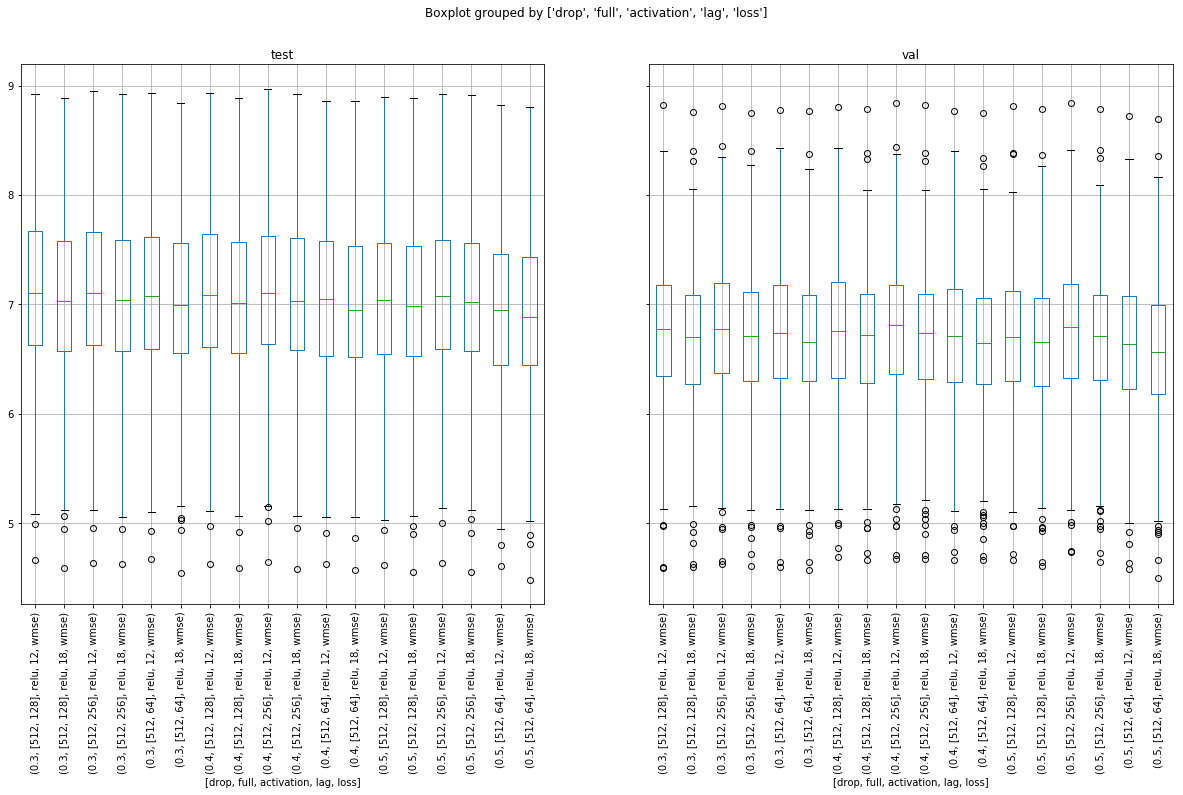

In [37]:
a.boxplot(by=['drop', 'full', 'activation','lag', 'loss'],figsize=(20,10), rot=90)

In [38]:
b =a.groupby(by=['activation','full', 'drop','loss','lag'],as_index=False).mean()
b.style.highlight_max()

,activation,full,drop,loss,lag,test,val
0,relu,"[512, 128]",0.3,wmse,12,7.03253,6.75022
1,relu,"[512, 128]",0.3,wmse,18,6.98069,6.6911
2,relu,"[512, 128]",0.4,wmse,12,7.00996,6.7388
3,relu,"[512, 128]",0.4,wmse,18,6.96552,6.68904
4,relu,"[512, 128]",0.5,wmse,12,6.97436,6.70512
5,relu,"[512, 128]",0.5,wmse,18,6.92636,6.65466
6,relu,"[512, 256]",0.3,wmse,12,7.03508,6.75373
7,relu,"[512, 256]",0.3,wmse,18,6.9817,6.69539
8,relu,"[512, 256]",0.4,wmse,12,7.02824,6.75767
9,relu,"[512, 256]",0.4,wmse,18,6.98311,6.70776


In [39]:
trace = go.Scatter(
    x = b['test'],
    y = b['val'],
    text='F-'+b['full'].astype(str) + 'D-' + b['drop'].astype(str) + '-L' + b['lag'].astype(str), 
    mode = 'markers'
)
py.iplot([trace], filename='basic-scatter')

## Fit 4(linear W MSE)

In [40]:
query={'experiment':'mlps2swmse2'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'full', 'activation', 'loss'], data=['lag'])

In [41]:
a=results.exp_df.groupby(['site','activation','drop','full','lag', 'loss'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc60509cf8>,
      dtype=object)

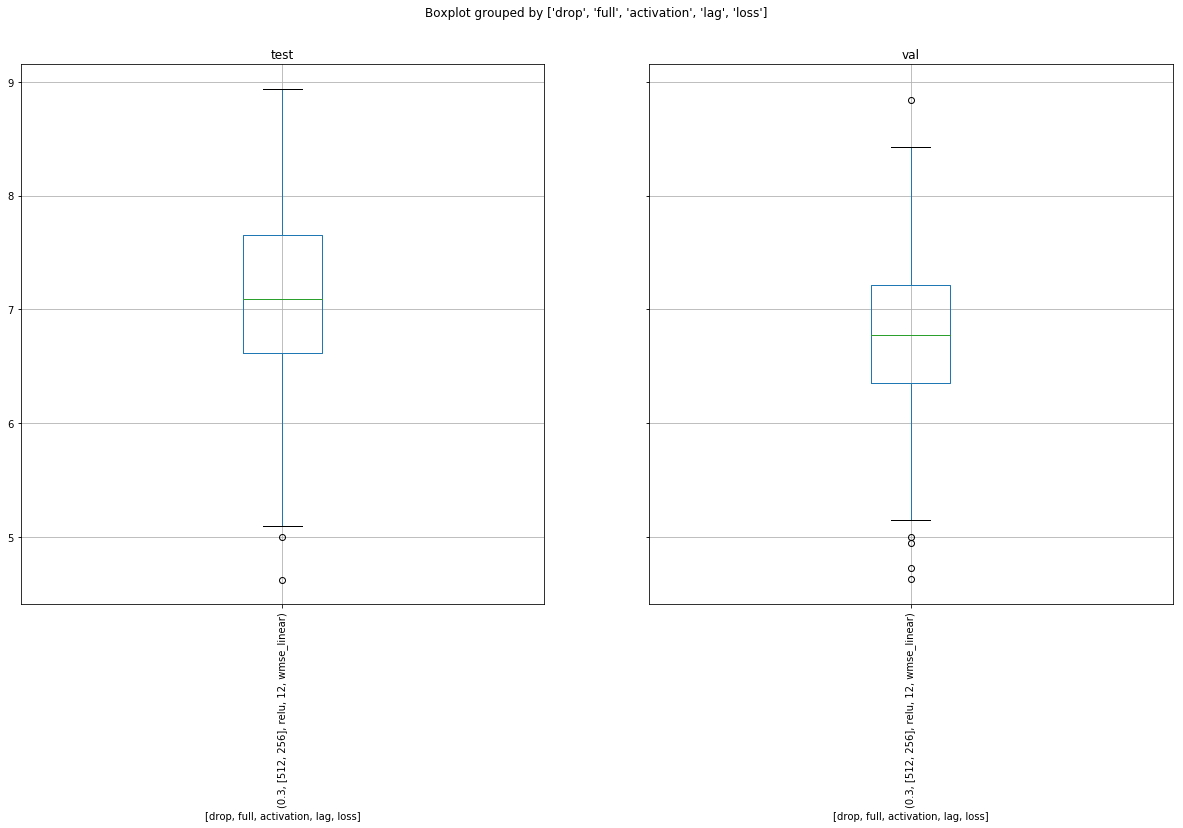

In [42]:
a.boxplot(by=['drop', 'full', 'activation','lag', 'loss'],figsize=(20,10), rot=90)

In [43]:
b =a.groupby(by=['activation','full', 'drop','lag', 'loss'],as_index=False).mean()
b.style.highlight_max()

,activation,full,drop,lag,loss,test,val
0,relu,"[512, 256]",0.3,12,wmse_linear,7.03446,6.7514


In [44]:
trace = go.Scatter(
    x = b['test'],
    y = b['val'],
    text='F-'+b['full'].astype(str) + 'D-' + b['drop'].astype(str) + '-L' + b['lag'].astype(str), 
    mode = 'markers'
)
py.iplot([trace], filename='basic-scatter')

## Fit 5 (squared W MSE)

In [50]:
query={'experiment':'mlps2swmse3'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'full', 'activation', 'loss'], data=['lag'])

In [51]:
a=results.exp_df.groupby(['site','activation','drop','full','lag', 'loss'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc50722278>,
      dtype=object)

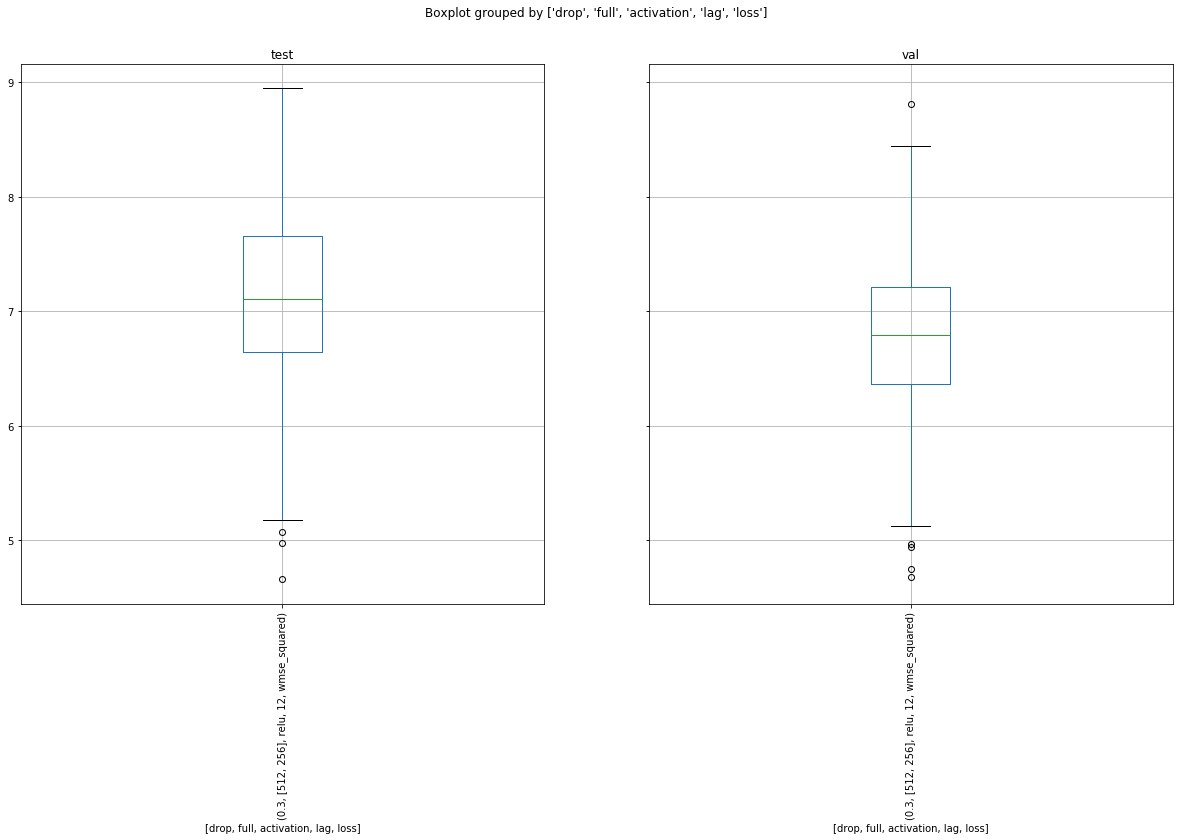

In [52]:
a.boxplot(by=['drop', 'full', 'activation','lag', 'loss'],figsize=(20,10), rot=90)

In [53]:
b =a.groupby(by=['activation','full', 'drop','lag', 'loss'],as_index=False).mean()
b.style.highlight_max()

,activation,full,drop,lag,loss,test,val
0,relu,"[512, 256]",0.3,12,wmse_squared,7.03302,6.75574


In [54]:
trace = go.Scatter(
    x = b['test'],
    y = b['val'],
    text='F-'+b['full'].astype(str) + 'D-' + b['drop'].astype(str) + '-L' + b['lag'].astype(str), 
    mode = 'markers'
)
py.iplot([trace], filename='basic-scatter')